## Linear regression (from Scratch)

Optimal parameters:
m (price increase per square foot): $168.22/ft²
b (base price): $36423.03
A 1200 ft² house is predicted to cost: $238283.50
A 2300 ft² house is predicted to cost: $423322.26
A 3500 ft² house is predicted to cost: $625182.72


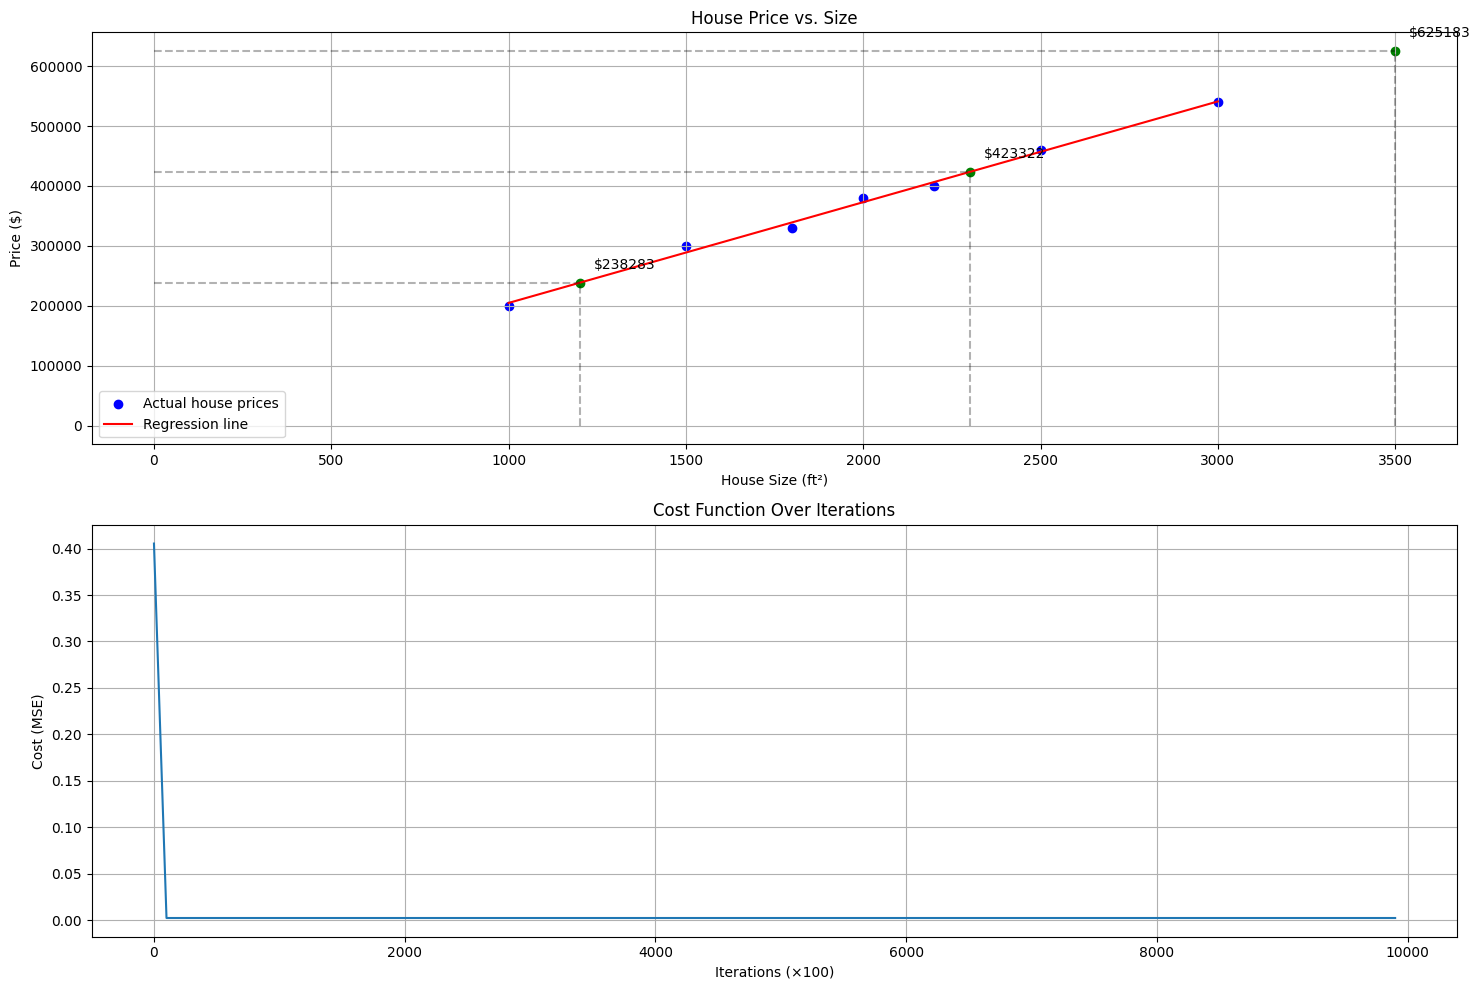

In [2]:
## linear regression without using any helper libraries
import numpy as np
import matplotlib.pyplot as plt

# House size (ft²) and price ($) data
x_data = np.array([1000, 1500, 1800, 2000, 2200, 2500, 3000])
y_data = np.array([200000, 300000, 330000, 380000, 400000, 460000, 540000])

# Normalize data (important for gradient descent)
# This helps gradient descent converge faster by making all features on similar scales
x_mean = np.mean(x_data)  # Average house size
x_std = np.std(x_data)    # Standard deviation of house sizes
x_norm = (x_data - x_mean) / x_std  # Normalized x values

y_mean = np.mean(y_data)  # Average price
y_std = np.std(y_data)    # Standard deviation of prices
y_norm = (y_data - y_mean) / y_std  # Normalized y values

def compute_cost(x, y, m, b):
    """
    Compute the cost function (Mean Squared Error)
    
    Parameters:
    x (array): Input features (house sizes)
    y (array): Actual values (house prices)
    m (float): Slope parameter
    b (float): Intercept parameter
    
    Returns:
    float: The cost (average squared error)
    """
    n = len(x)  # Number of training examples
    
    # Calculate predictions (y_hat) using current m and b
    predictions = m * x + b
    
    # Calculate squared differences between predictions and actual values
    squared_errors = (predictions - y) ** 2
    
    # Calculate mean squared error (divided by 2 to make derivatives cleaner)
    cost = (1/(2*n)) * np.sum(squared_errors)
    
    return cost

def gradient_descent(x, y, m_init, b_init, learning_rate, iterations):
    """
    Perform gradient descent to minimize the cost function
    
    Parameters:
    x (array): Input features (house sizes)
    y (array): Actual values (house prices)
    m_init (float): Initial slope value
    b_init (float): Initial intercept value
    learning_rate (float): How quickly to adjust parameters
    iterations (int): Number of times to update parameters
    
    Returns:
    m (float): Optimized slope parameter
    b (float): Optimized intercept parameter
    costs (list): Cost at each iteration for plotting
    """
    m = m_init  # Initial slope
    b = b_init  # Initial intercept
    n = len(x)  # Number of training examples
    costs = []   # To store cost at each iteration
    
    for i in range(iterations):
        # Calculate predictions with current parameters
        predictions = m * x + b
        
        # Calculate prediction errors
        errors = predictions - y
        
        # Calculate gradients (partial derivatives)
        # ∂J/∂m = (1/n) × Σ[(m×xi + b - yi) × xi]
        d_m = (1/n) * np.sum(errors * x)
        
        # ∂J/∂b = (1/n) × Σ[(m×xi + b - yi)]
        d_b = (1/n) * np.sum(errors)
        
        # Update parameters using gradients and learning rate
        m = m - learning_rate * d_m
        b = b - learning_rate * d_b
        
        # Calculate and store cost for this iteration
        if i % 100 == 0:
            cost = compute_cost(x, y, m, b)
            costs.append(cost)
            
    return m, b, costs

# Run gradient descent (on normalized data)
iterations = 10000
learning_rate = 0.1
initial_m = 0
initial_b = 0

# Find optimal m and b
final_m_norm, final_b_norm, costs = gradient_descent(
    x_norm, y_norm, initial_m, initial_b, learning_rate, iterations
)

# Convert the parameters back to original scale
# For a normalized model y_norm = m_norm * x_norm + b_norm
# We need to convert it back to y = m * x + b
final_m = final_m_norm * (y_std / x_std)
final_b = (final_b_norm * y_std) + y_mean - (final_m_norm * x_mean * y_std / x_std)

print(f"Optimal parameters:")
print(f"m (price increase per square foot): ${final_m:.2f}/ft²")
print(f"b (base price): ${final_b:.2f}")

# Function to predict house price based on size
def predict_price(size_sqft):
    """Predict house price based on size"""
    return final_m * size_sqft + final_b

# Make predictions for various house sizes
test_sizes = [1200, 2300, 3500]
for size in test_sizes:
    predicted_price = predict_price(size)
    print(f"A {size} ft² house is predicted to cost: ${predicted_price:.2f}")

# Visualization
plt.figure(figsize=(15, 10))

# Plot 1: Data points and regression line
plt.subplot(2, 1, 1)
plt.scatter(x_data, y_data, color='blue', label='Actual house prices')
plt.plot(x_data, final_m * x_data + final_b, color='red', label='Regression line')
plt.title('House Price vs. Size')
plt.xlabel('House Size (ft²)')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)

# Add price predictions for specific sizes
for size in test_sizes:
    price = predict_price(size)
    plt.plot([size, size], [0, price], 'k--', alpha=0.3)
    plt.plot([0, size], [price, price], 'k--', alpha=0.3)
    plt.scatter(size, price, color='green')
    plt.annotate(f'${price:.0f}', (size, price), xytext=(10, 10), 
                 textcoords='offset points')

# Plot 2: Cost history
plt.subplot(2, 1, 2)
plt.plot(range(0, iterations, 100), costs)
plt.title('Cost Function Over Iterations')
plt.xlabel('Iterations (×100)')
plt.ylabel('Cost (MSE)')
plt.grid(True)

plt.tight_layout()
plt.savefig('house_price_regression.png')
plt.show()